Importando las librerias de manejo de datos (pandas) la libreria para hacer graficos (matplotlib), la libreria cientifica (scipy) y la libreria de manejo numerico (numpy)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from scipy import optimize
import numpy as np

Luego definimos las funciones de fiteo exponencial

In [35]:
def test_func(x, a, b, c):
    return a + b* np.exp(c * x)

Importando la serie de tiempo con los casos confirmados (localmente por el momento)

In [28]:
cases = pd.read_csv("time_series_19-covid-Confirmed.csv")

In [29]:
data = cases.loc[cases['Country/Region'].isin(['Chile','Germany','Korea, South','Spain','Italy', 'Argentina'])].T
UK_data    = cases.loc[cases['Province/State'] == 'United Kingdom'].T
data = pd.concat([data, UK_data], axis=1)

In [30]:
ts_data = data.loc['1/22/20':'3/27/20'].rename(columns = {67: "Chile", 16: "Italia", 403: "Reino Unido", 156: "Corea del Sur", 18: "Espana", 11: "Alemania", 66: "Argentina"})

[0, 20, 0, 3000]

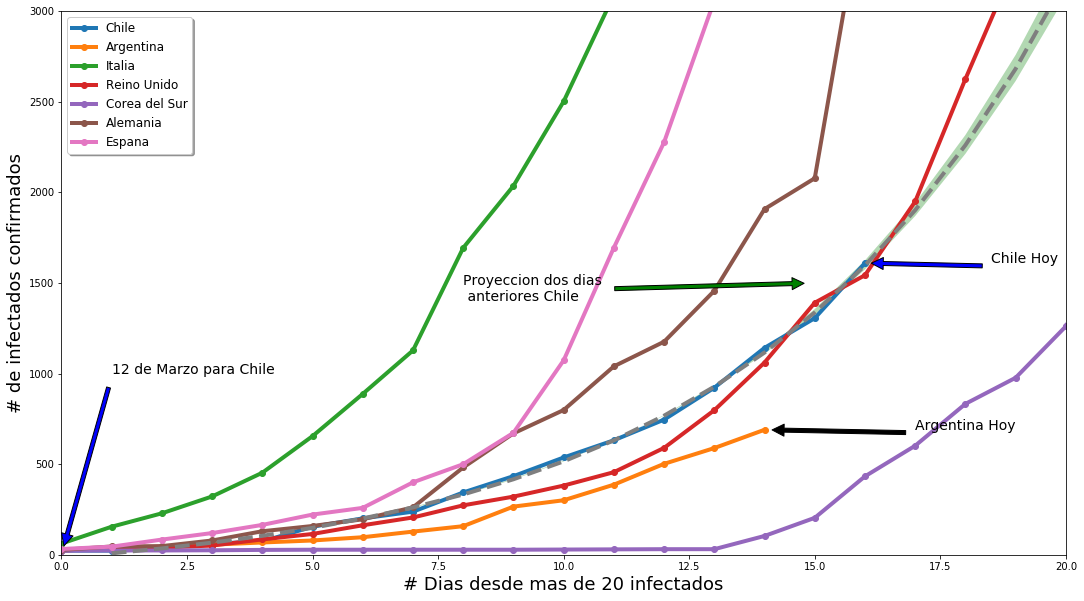

In [36]:
min_confirm = 20
countries = ['Chile','Argentina','Italia','Reino Unido','Corea del Sur','Alemania','Espana']
data_country = {}
fig, ax = plt.subplots()
for country in countries:
    data_country[country] = ts_data[country].loc[ts_data[country] > min_confirm]
    ax.plot([i for i in range(0, len(data_country[country]))], data_country[country], label = str(country), linewidth=4, marker = "." , markersize = 12)

legend = ax.legend(loc = 'upper left', shadow = True, fontsize='larger')
plt.xlabel('# Dias desde mas de 20 infectados', size =18)
plt.ylabel('# de infectados confirmados', size =18)

ax.annotate('Proyeccion dos dias\n anteriores Chile', xy=(15, 1500), xytext=(8, 1400),
            arrowprops=dict(facecolor='green', shrink=0.05),size = 14)

ax.annotate('12 de Marzo para Chile', xy=(0, 0), xytext=(1, 1000),
            arrowprops=dict(facecolor='blue', shrink=0.05), size = 14)

ax.annotate('Chile Hoy', xy=(len(data_country['Chile'])-1, data_country['Chile'][-1]), xytext=(len(data_country['Chile'])+1.5, data_country['Chile'][-1]),
            arrowprops=dict(facecolor='blue', shrink=0.05), size = 14)

ax.annotate('Argentina Hoy', xy=(len(data_country['Argentina'])-1, data_country['Argentina'][-1]), xytext=(len(data_country['Argentina'])+2, data_country['Argentina'][-1]),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 14)

x  = np.array([i for i in range(1, len(data_country['Chile']))])
params_m2, pcov_m2 = optimize.curve_fit(test_func, x[:-2], np.array(data_country['Chile'][1:],dtype = float)[:-2],
                                               p0=[2, 2, 2])
params_m1, pcov_m1 = optimize.curve_fit(test_func, x[:-1], np.array(data_country['Chile'][1:],dtype = float)[:-1],
                                               p0=[2, 2, 2])
params, pcov       = optimize.curve_fit(test_func, x, np.array(data_country['Chile'][1:],dtype = float),
                                               p0=[2, 2, 2])

days = np.array([i for i in range(1,100)])
ax.plot(days, test_func(days, params[0], params[1], params[2]),
         label='Proyeccion Chile hoy', linewidth = 4, linestyle ='--')

proj_m1 = test_func(days, params_m1[0], params_m1[1], params_m1[2])
proj_m2 = test_func(days, params_m2[0], params_m2[1], params_m2[2])

ax.fill_between(days , proj_m1, proj_m2,  facecolor='green', alpha=0.3)
ax.axis([0, 20, 0, 3000])